In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize


plt.rcParams.update({"font.size" : 14, "font.family" : "serif"})

In [19]:
file1 = "/Users/goloshch/PycharmProjects/Sandbox/Resonator/data/gauss_data/120mm.jpg"
image = plt.imread(file1)
image = np.mean(image, axis=2)
image /= np.max(image)

px_size = 9e-6

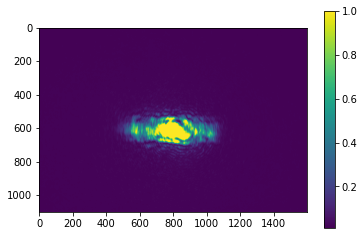

In [21]:
plt.imshow(image)
plt.colorbar()

In [26]:
def gauss(x, y, x0, y0, sigma_x, sigma_y):
    return np.exp(-(x-x0)**2/(2*sigma_x**2)-(y-y0)**2/(2*sigma_y**2))

def cost_func(params, image):
    x0, y0, sigma_x, sigma_y = params
    xlen, ylen = image.shape
    x, y = np.arange(xlen), np.arange(ylen)
    xv, yv = np.meshgrid(x, y)
    return np.linalg.norm(image/image.max() - gauss(xv, yv, x0, y0, sigma_x, sigma_y).T)

def display_params(params):
    x0, y0, sigma_x, sigma_y = params
    print("x0       = {}".format(x0))
    print("y0       = {}".format(y0))
    print("sigma_x0 = {}".format(sigma_x))
    print("sigma_y0 = {}".format(sigma_y))


res = minimize(cost_func, args=(image), x0=[600, 800, 50, 50])

x0       = 617.2986285364051
y0       = 790.5215067981445
sigma_x0 = 52.53476810545138
sigma_y0 = 154.38306082927332

Ошибка при апроксимации гауссом                   :  62.16844721189264
Ошибка при апроксимации плоскостью с значением 0.5:  648.7604654854132


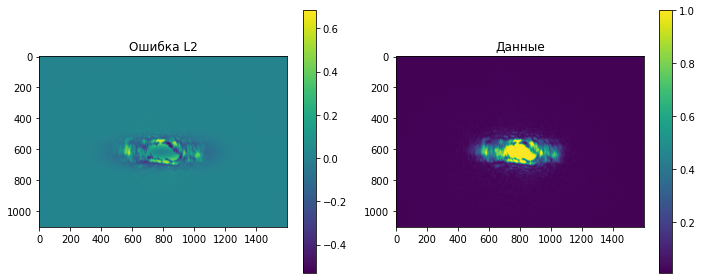

In [27]:
display_params(res.x)
xlen, ylen = image.shape
x, y = np.arange(xlen), np.arange(ylen)
xv, yv = np.meshgrid(x, y)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image - gauss(xv, yv, *res.x).T)
plt.title("Ошибка L2")
plt.colorbar()

plt.subplot(122)
plt.imshow(image/image.max())
plt.title("Данные")
plt.colorbar()

plt.tight_layout()
print()
print("Ошибка при апроксимации гауссом                   : ", cost_func(res.x, image))
print("Ошибка при апроксимации плоскостью с значением 0.5: ", cost_func(res.x, np.ones(shape=image.shape))/2)

In [33]:
Z = [94, 120, 144, 169, 191, 217, 246, 269, 293, 315, 345, 371, 402, 445, 472]
Sigma_Y, Sigma_X = [], []

for z in Z:
    file1 = "/Users/goloshch/PycharmProjects/Sandbox/Resonator/data/gauss_data/{}mm.jpg".format(z)
    image = plt.imread(file1)
    image = np.mean(image, axis=2)
    image /= np.max(image)
    
    res = minimize(cost_func, args=(image), x0=[650, 800, 50, 150], )
    x, y, sigma_x, sigma_y = res.x
    Sigma_X.append(sigma_x)
    Sigma_Y.append(sigma_y)


KeyboardInterrupt



In [72]:
Sigma_Y, Sigma_X = [], []

for z in Z:
    
    file1 = "/Users/goloshch/PycharmProjects/Sandbox/Resonator/data/gauss_data/{}mm.jpg".format(z)
    image = plt.imread(file1)
    image = np.mean(image, axis=2)
    image /= np.max(image)
    
    xidx, yidx = np.unravel_index(image.argmax(), image.shape)
    
    res = minimize(cost_func, args=(image), x0=[xidx, yidx, 50, 150], )
    x, y, sigma_x, sigma_y = res.x
    Sigma_X.append(sigma_x)
    Sigma_Y.append(sigma_y)
    
print(Sigma_X, Sigma_Y)

[51.953204892176544, 52.534814736480335, 53.52446784223617, 52.58743162595171, 55.40714624242569, 57.39639644882391, 55.9984824431431, 56.00427339973778, 56.177385092733715, 55.80683784158959, 59.74640140049141, 57.78178008014918, 57.097543202084815, 58.16808524531182, 57.64053572635678] [155.46742297249185, 154.38266896563562, 157.4675593349364, 150.64213531358553, 157.8637700310748, 160.79349343855, 157.34163054320024, 152.60393709140322, 156.84829430897184, 147.29623765639303, 160.4084301368642, 156.5020674041402, 147.0121588217602, 148.3309582943902, 144.6147347153837]


Text(0, 0.5, '$\\sigma_Y$, мм')

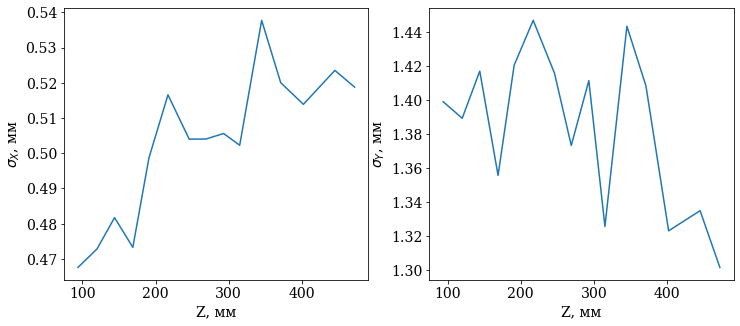

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(Z, np.array(Sigma_X) * px_size * 1e3)
plt.xlabel("Z, мм")
plt.ylabel("$\\sigma_X$, мм")


plt.subplot(122)
plt.plot(Z, np.array(Sigma_Y) * px_size * 1e3)
plt.xlabel("Z, мм")
plt.ylabel("$\\sigma_Y$, мм")

[9.84142547e+02 4.81632902e-01]


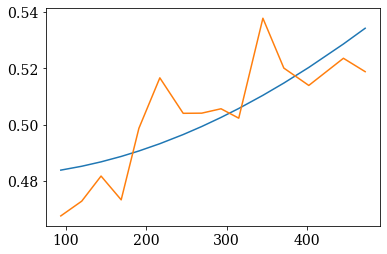

In [83]:
def w(z, z0, w0):
    return w0*np.sqrt(1 + (z/z0)**2)

popt, pcov = curve_fit(w, Z, np.array(Sigma_X) * px_size * 1e3, p0=[50, 0.45])
print(popt)
plt.plot(Z, w(Z, *popt))
plt.plot(Z, np.array(Sigma_X) * px_size * 1e3)

In [39]:
x0, y0 = [900, 800, 750, 800, 800, 800, 850, 900, 900, 800, 900, 850],[600, 600, 650, 650, 650, 700, 700, 750, 800, 800, 800, 850]

print(len(x0), len(y0))

12 12


In [49]:
50 * px_size * 1e3

150 * px_size * 1e3

1.35

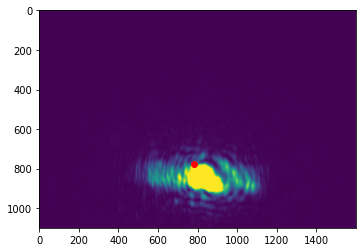

In [71]:
xs, ys = image.shape

xidx, yidx = np.unravel_index(image.argmax(), image.shape)


plt.imshow(image)
plt.scatter(yidx, xidx, color="red")